# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
bc_df=pd.read_csv("breast-cancer-wisconsin-data.csv")
bc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
bc_df.shape
bc_df_orignal=bc_df

In [5]:
#bc_df=bc_df.drop("ID", axis=1)  ## id to be dropped later
bc_df=bc_df.drop("Class", axis=1)
bc_df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [7]:
bc_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
bc_df.isna().count() ## no missing

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
dtype: int64

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
bc_df[bc_df['Bare Nuclei'] == '?']['Bare Nuclei'].count()

16

In [10]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [11]:
bc_df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [12]:
bc_df.mode()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,1182404,1,1,1,1,2,1,2,1,1


In [13]:
mode=bc_df.mode()['Bare Nuclei'][0]
mode

'1'

In [14]:
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
dtype: object

In [15]:
bc_df['Bare Nuclei'].replace('?',mode,inplace=True) ## replacing ? with mode value of column

In [16]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [17]:
bc_df[bc_df['Bare Nuclei'] == '?']['Bare Nuclei'].count() ## now no more ? left, rechecked

0

In [18]:
bc_df['Bare Nuclei'] =bc_df['Bare Nuclei'].astype('int64') 

In [19]:
bc_df.describe()   ##Bare Nuclei is now included in below

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [20]:
##dropping duplicate
bc_df.shape

(699, 10)

In [21]:
bc_df=bc_df.drop_duplicates()

In [22]:
bc_df.shape   ## 8 dupliactes have been dropped now

(690, 10)

In [23]:
bc_df=bc_df.drop("ID", axis=1)   ## we may now drop the id 

In [24]:
bc_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


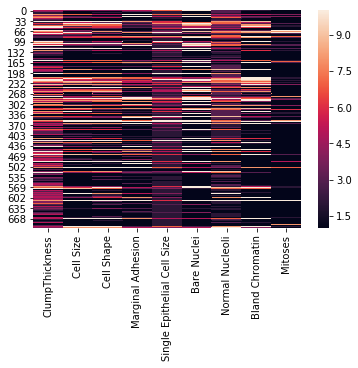

In [25]:
sns.heatmap(bc_df)

In [26]:
# Check for correlation of variable

bc_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000


In [27]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [28]:
#Let us check for pair plots

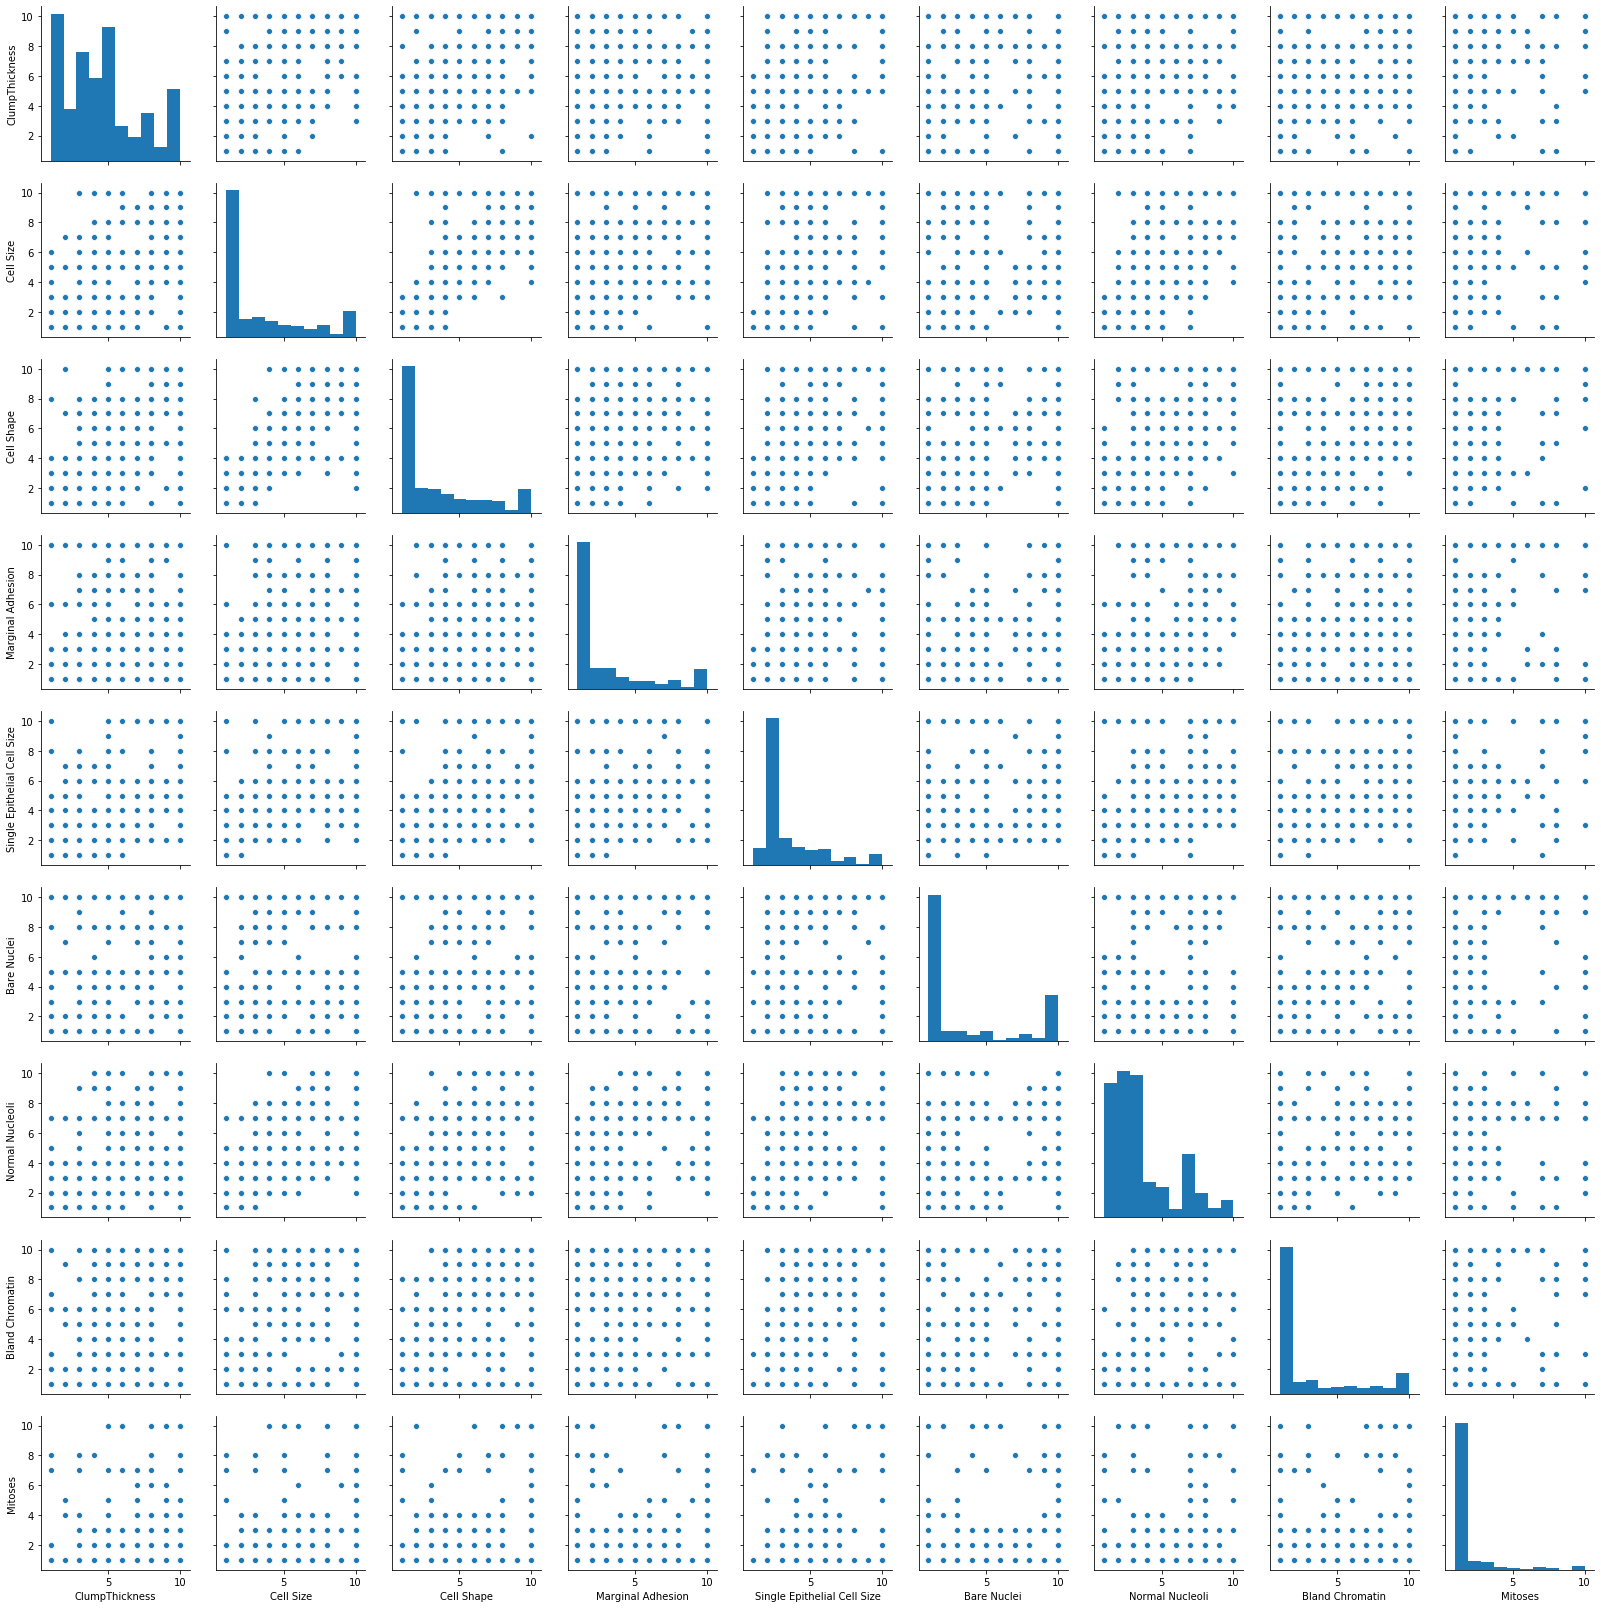

In [29]:
sns.pairplot(bc_df)

In [30]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range 
# remains same for all that is Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [31]:
# We could see most of the outliers are now removed.  Box  plot treat  the outliers and redraw 

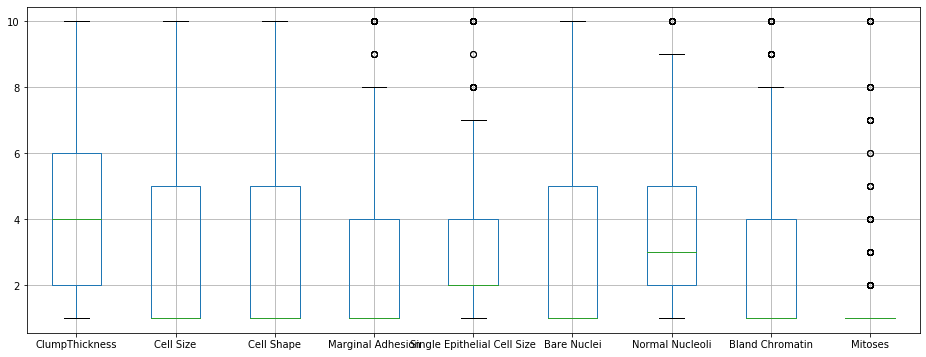

In [32]:
plt.figure(figsize=(16, 6))
bc_df.boxplot()
plt.show()

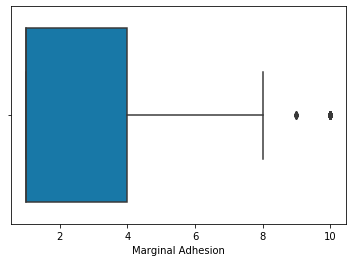

In [33]:
sns.boxplot(data=bc_df,x='Marginal Adhesion',palette='winter')
#bc_df.columns

In [34]:
## Looking at the information content in col Marginal Adhesion
pd.crosstab(bc_df_orignal['Class'],bc_df_orignal['Marginal Adhesion'])

#from this we can see the values 9 , 10 that are outliers here, of them 10 contibute to class 4 we would not drop this,
# but can remove 9, since it contribute low to any class

Marginal Adhesion,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,375,37,31,5,4,4,0,0,1,1
4,32,21,27,28,19,18,13,25,4,54


In [35]:
bc_df.describe()['Marginal Adhesion']

count    690.000000
mean       2.827536
std        2.867787
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Marginal Adhesion, dtype: float64

In [36]:
QTR75=bc_df.describe()['Marginal Adhesion'][6]
#QTR75.dtype
## replacing cells with Marginal Adhesion value =9 with mean value
bc_df['Marginal Adhesion'].replace(9,QTR75,inplace=True) ## replacing cells with 9 with 75% QTR value

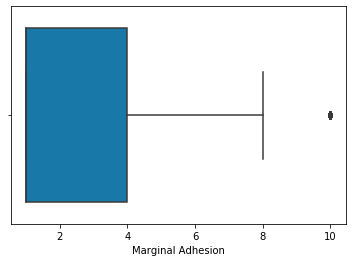

In [37]:
sns.boxplot(data=bc_df,x='Marginal Adhesion',palette='winter')
# outliers has been reduced now

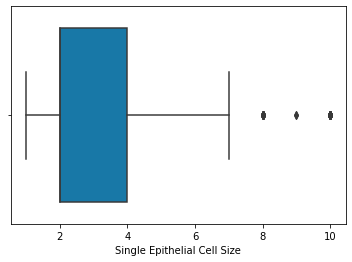

In [38]:
## next column with outliers
sns.boxplot(data=bc_df,x='Single Epithelial Cell Size',palette='winter')

In [39]:
## Looking at the information content in col Marginal Adhesion
pd.crosstab(bc_df_orignal['Class'],bc_df_orignal['Single Epithelial Cell Size'])

#from this we can see the values 9 , 10 that are outliers here, of them 10 contibute to class 4 we would not drop this,
# but can remove/replace 9, since it contribute low to any class

Single Epithelial Cell Size,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,46,363,29,7,5,2,3,2,0,1
4,1,23,43,41,34,39,9,19,2,30


In [40]:
bc_df['Single Epithelial Cell Size']=np.where(bc_df['Single Epithelial Cell Size']>=8,5,bc_df['Single Epithelial Cell Size'])

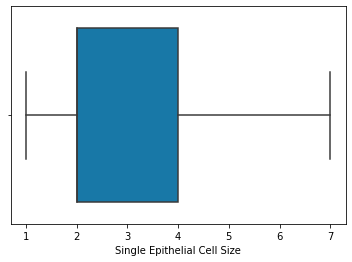

In [41]:
sns.boxplot(data=bc_df,x='Single Epithelial Cell Size',palette='winter')

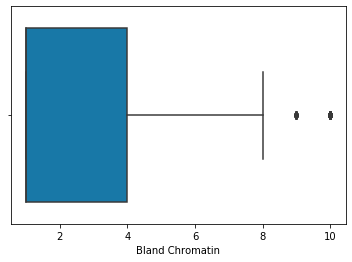

In [42]:
# 3rd column having outlier
sns.boxplot(data=bc_df,x='Bland Chromatin',palette='winter')

In [43]:
pd.crosstab(bc_df_orignal['Class'],bc_df_orignal['Bland Chromatin'])
# since values 9, 10 contributes more to class 4, hence we should keep these

Bland Chromatin,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,402,30,12,1,2,4,2,4,1,0
4,41,6,32,17,17,18,14,20,15,61


In [44]:
#bc_df['Bland Chromatin']=np.where(bc_df['Bland Chromatin']>=8,1,bc_df['Bland Chromatin'])

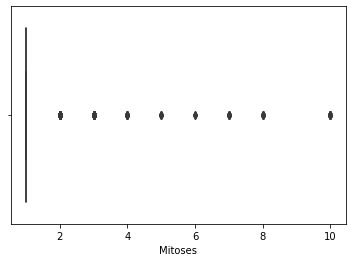

In [45]:
# 4 column with outlier
sns.boxplot(data=bc_df,x='Mitoses',palette='winter')

In [46]:
pd.crosstab(bc_df_orignal['Class'],bc_df_orignal['Mitoses'])
# since values 9, 10 contributes more to class 4, hence we should keep these

Mitoses,1,2,3,4,5,6,7,8,10
Class,,,,,,,,,
2,445,8,2,0,1,0,1,1,0
4,134,27,31,12,5,3,8,7,14


In [47]:
bc_df['Mitoses']=np.where(bc_df['Mitoses']>3,3,bc_df['Mitoses'])

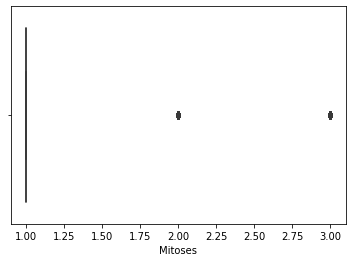

In [48]:
sns.boxplot(data=bc_df,x='Mitoses',palette='winter')

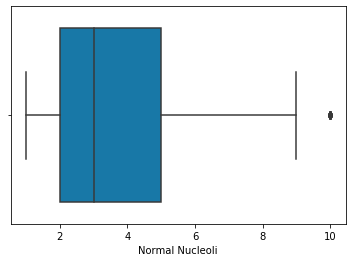

In [49]:
# 5 column having outlier
sns.boxplot(data=bc_df,x='Normal Nucleoli',palette='winter')

In [50]:
pd.crosstab(bc_df_orignal['Class'],bc_df_orignal['Normal Nucleoli'])
# since values 9, 10 contributes more to class 4, hence we should keep these

Normal Nucleoli,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
2,150,159,129,8,4,1,7,0,0,0
4,2,7,36,32,30,9,66,28,11,20


In [51]:
mean=bc_df.mean()['Normal Nucleoli']
mean

3.436231884057971

In [52]:
## cant remove any outlier from here

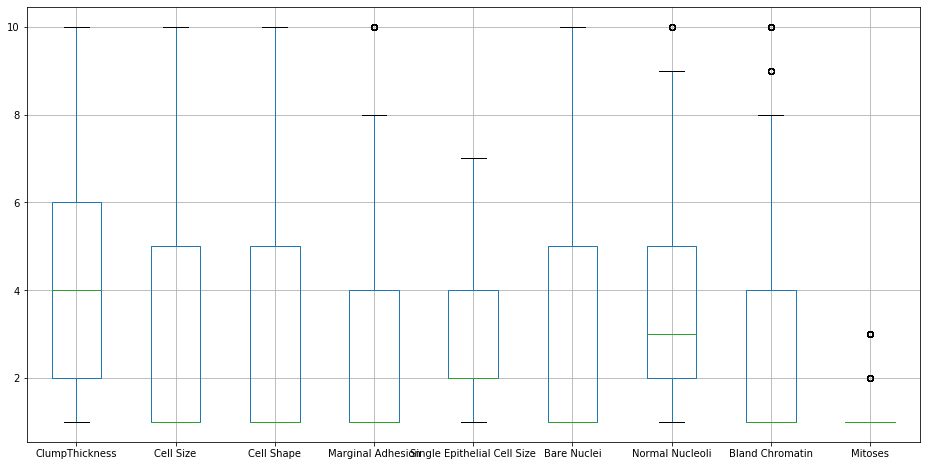

In [53]:
plt.figure(figsize=(16, 8))
bc_df.boxplot()
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
bc_df_trans = sc.fit_transform(bc_df)  # scale training and test data independently to prevent data leaks


# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [58]:
cov_matrix = np.cov(bc_df_trans.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.48664877 0.55207426 0.59150555
  0.56187702 0.53628373 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.71290031 0.77303543 0.68556472
  0.76073447 0.7281282  0.51098944]
 [0.65453792 0.9066632  1.00145138 0.68942779 0.74655267 0.70518656
  0.73964761 0.72557104 0.48167882]
 [0.48664877 0.71290031 0.68942779 1.00145138 0.662065   0.6729149
  0.67273314 0.60176954 0.4817272 ]
 [0.55207426 0.77303543 0.74655267 0.662065   1.00145138 0.63911086
  0.66256621 0.69393954 0.479077  ]
 [0.59150555 0.68556472 0.70518656 0.6729149  0.63911086 1.00145138
  0.67373075 0.57900023 0.45258904]
 [0.56187702 0.76073447 0.73964761 0.67273314 0.66256621 0.67373075
  1.00145138 0.67006996 0.39765955]
 [0.53628373 0.7281282  0.72557104 0.60176954 0.69393954 0.57900023
  0.67006996 1.00145138 0.48797149]
 [0.42745595 0.51098944 0.48167882 0.4817272  0.479077   0.45258904
  0.39765955 0.48797149 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [59]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.29952365 -0.00799231  0.00564629 -0.87322055  0.13000012  0.33429143
  -0.1296272   0.0471247   0.0009828 ]
 [ 0.37494407 -0.73214443 -0.1032957   0.01778125 -0.25912686 -0.33468669
  -0.27407764  0.17316556 -0.16771563]
 [ 0.37112502  0.66649409 -0.14025273 -0.04609454 -0.43054578 -0.36062984
  -0.18725704  0.15086047 -0.15168614]
 [ 0.33155045  0.03663973 -0.02063912  0.38484364 -0.11026564  0.57624305
  -0.38962953  0.16750246  0.46488539]
 [ 0.34534101  0.06795756 -0.04956591  0.18624619  0.5500947   0.00581926
   0.32489832  0.61340688 -0.233478  ]
 [ 0.33233097 -0.08050719 -0.09276866 -0.08421473 -0.18395194 -0.17916228
   0.65386147 -0.11088106  0.60133992]
 [ 0.34224178  0.06856073 -0.27677259  0.1143191   0.55711167 -0.23483463
  -0.25777646 -0.59359042  0.06464572]
 [ 0.33410768 -0.03540333  0.00556778  0.17391387 -0.2551791   0.44517611
   0.34321017 -0.40594859 -0.5576343 ]
 [ 0.2521535   0.0359195   0.93888468  0.0429618   0.08057781 -0.16929876
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [62]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print("var_exp",var_exp)

var_exp [67.12837856648741, 7.554777755698136, 6.061310584973135, 5.213937074049606, 3.6351791326722434, 3.4030218770079066, 3.1612010039499405, 2.8439121357744974, 0.998281869387114]


In [64]:
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 67.12837857  74.68315632  80.74446691  85.95840398  89.59358311
  92.99660499  96.15780599  99.00171813 100.        ]


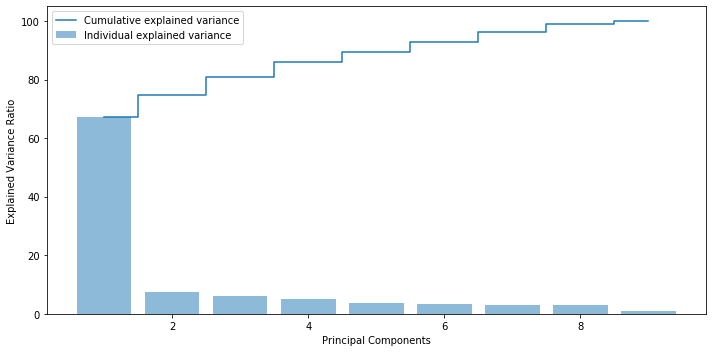

In [65]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [91]:
#using PCA package now
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=7)   # 6 of 9 dimensions are there
X_spca = scikit_pca.fit_transform(bc_df_trans)

# Q10 Find correlation between components and features

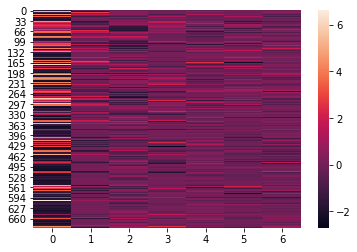

In [92]:
sns.heatmap(X_spca)

In [93]:
np.corrcoef(X_spca)

array([[ 1.        , -0.54336717,  0.88556774, ..., -0.72338328,
        -0.70642785, -0.78092241],
       [-0.54336717,  1.        , -0.46756314, ...,  0.12198208,
         0.0308824 ,  0.23349079],
       [ 0.88556774, -0.46756314,  1.        , ..., -0.81188403,
        -0.58680953, -0.65506925],
       ...,
       [-0.72338328,  0.12198208, -0.81188403, ...,  1.        ,
         0.87605379,  0.84405928],
       [-0.70642785,  0.0308824 , -0.58680953, ...,  0.87605379,
         1.        ,  0.95903907],
       [-0.78092241,  0.23349079, -0.65506925, ...,  0.84405928,
         0.95903907,  1.        ]])

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [131]:
jokes_df=pd.read_csv("jokes.csv");
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [132]:
jokes_df.shape

(24983, 101)

In [133]:
jokes_df=jokes_df.iloc[:200,1:101]
jokes_df.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [134]:
(jokes_df==99.0).sum()

Joke1       59
Joke2       37
Joke3       70
Joke4       93
Joke5        0
Joke6       60
Joke7        0
Joke8        0
Joke9       84
Joke10      32
Joke11      37
Joke12      40
Joke13       0
Joke14      35
Joke15       0
Joke16       0
Joke17       0
Joke18       0
Joke19       0
Joke20       0
Joke21       3
Joke22      34
Joke23      39
Joke24      86
Joke25      28
Joke26      15
Joke27       1
Joke28      10
Joke29       2
Joke30      63
          ... 
Joke71     131
Joke72     135
Joke73     136
Joke74     136
Joke75     138
Joke76     136
Joke77     137
Joke78     134
Joke79     135
Joke80     136
Joke81     131
Joke82     132
Joke83     132
Joke84     133
Joke85     129
Joke86     128
Joke87     128
Joke88     130
Joke89     135
Joke90     125
Joke91     134
Joke92     129
Joke93     125
Joke94     125
Joke95     129
Joke96     129
Joke97     121
Joke98     133
Joke99     123
Joke100    133
Length: 100, dtype: int64

In [135]:
jokes_df.replace(99.00,0,inplace=True) ## replacing ? with mode value of column

In [146]:
(jokes_df==99.0).sum()

Joke1      0
Joke2      0
Joke3      0
Joke4      0
Joke5      0
Joke6      0
Joke7      0
Joke8      0
Joke9      0
Joke10     0
Joke11     0
Joke12     0
Joke13     0
Joke14     0
Joke15     0
Joke16     0
Joke17     0
Joke18     0
Joke19     0
Joke20     0
Joke21     0
Joke22     0
Joke23     0
Joke24     0
Joke25     0
Joke26     0
Joke27     0
Joke28     0
Joke29     0
Joke30     0
          ..
Joke71     0
Joke72     0
Joke73     0
Joke74     0
Joke75     0
Joke76     0
Joke77     0
Joke78     0
Joke79     0
Joke80     0
Joke81     0
Joke82     0
Joke83     0
Joke84     0
Joke85     0
Joke86     0
Joke87     0
Joke88     0
Joke89     0
Joke90     0
Joke91     0
Joke92     0
Joke93     0
Joke94     0
Joke95     0
Joke96     0
Joke97     0
Joke98     0
Joke99     0
Joke100    0
Length: 100, dtype: int64

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [147]:
ratings_diff=jokes_df.mean()
top10Jokes=ratings_diff.sort_values(ascending=False).head(10)
print("Top 10 joke ids :")
print(top10Jokes)

Top 10 joke ids :
Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64
